In [1]:
#Choose any dataset of your choice and apply a suitable CLASSIFIER/REGRESSOR

In [1]:
#LOGISTIC REGRESSION

In [2]:
#datset-https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [3]:
#create dataframe
import pandas as pd
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.size

14350

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
#data visualisation
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

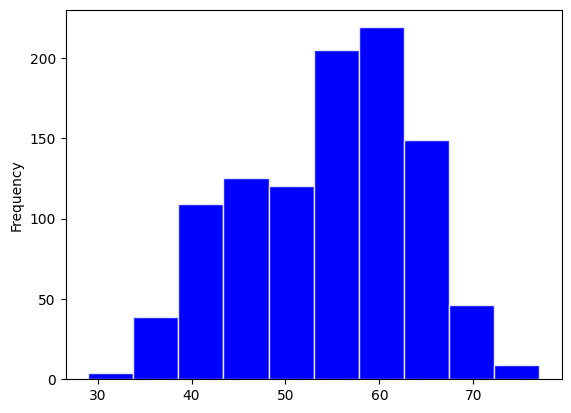

In [12]:
df['age'].plot(kind='hist',color='blue',edgecolor='lavender')

<Axes: ylabel='Frequency'>

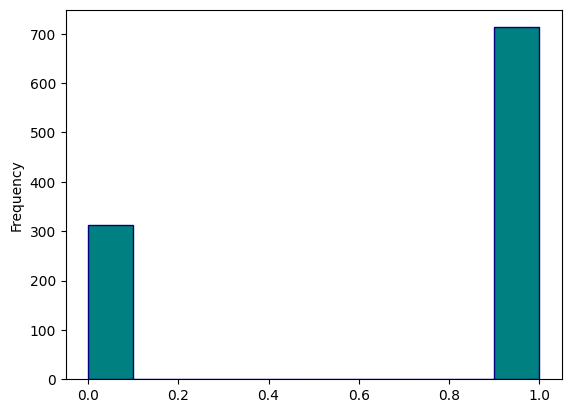

In [13]:
#1 male 0 feamale
df['sex'].plot(kind='hist',color='teal',edgecolor='navy')

<Axes: ylabel='Frequency'>

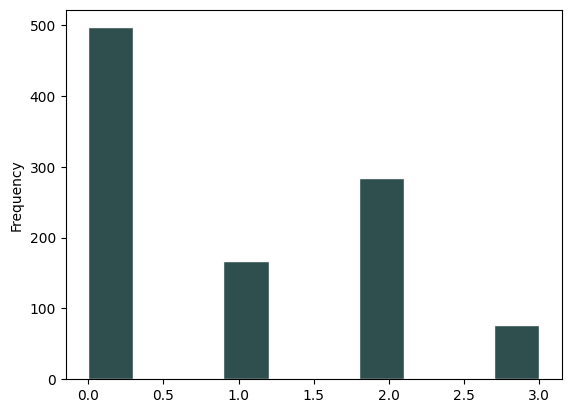

In [15]:
#chest pain type
df['cp'].plot(kind='hist',color='darkslategrey',edgecolor='snow')

<Axes: ylabel='Frequency'>

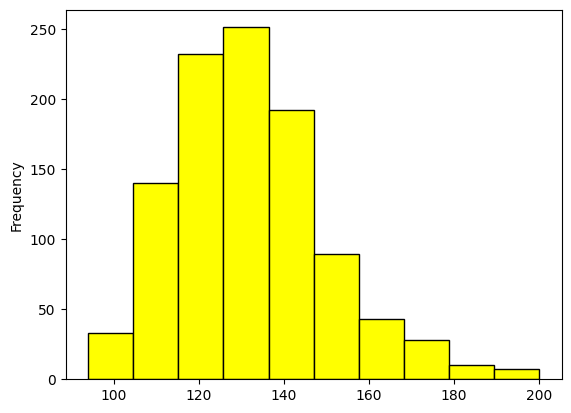

In [16]:
#resting blood pressure
df['trestbps'].plot(kind='hist',color='yellow',edgecolor='black')

<Axes: ylabel='Frequency'>

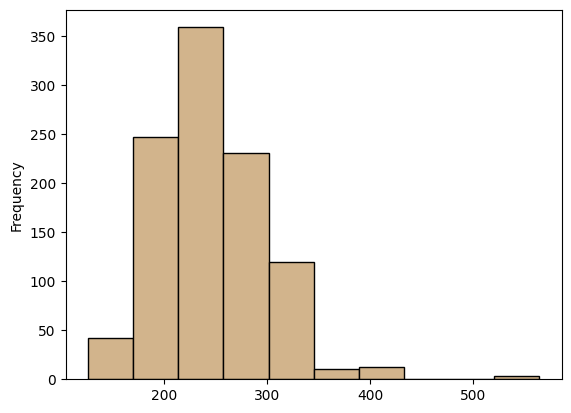

In [19]:
#cholestrol
df['chol'].plot(kind='hist',color='tan',edgecolor='black')

<Axes: ylabel='Frequency'>

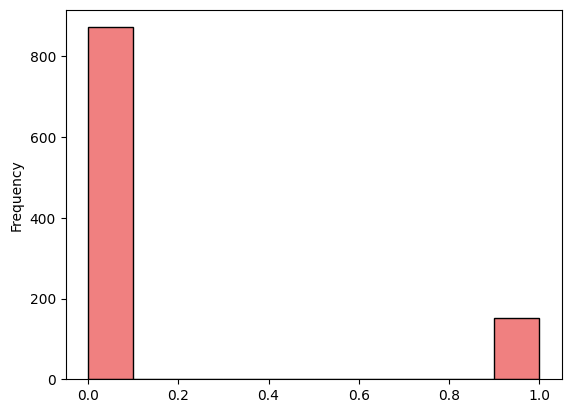

In [20]:
#fasting blood sugar
df['fbs'].plot(kind='hist',color='lightcoral',edgecolor='black')

<Axes: ylabel='Frequency'>

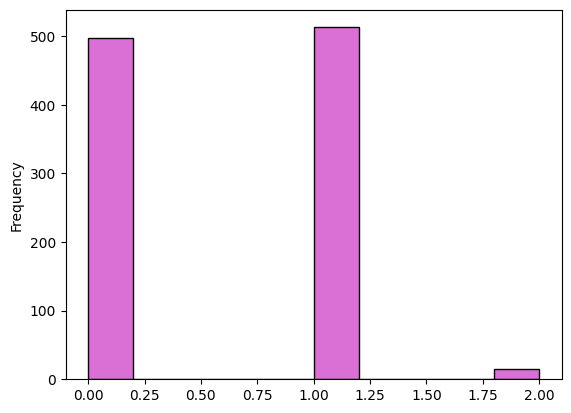

In [21]:
#resting electro cardiographic result
df['restecg'].plot(kind='hist',color='orchid',edgecolor='black')

<Axes: ylabel='Frequency'>

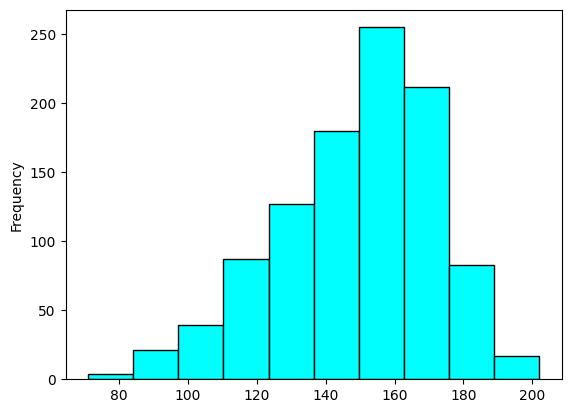

In [22]:
#max heart rate
df['thalach'].plot(kind='hist',color='cyan',edgecolor='black')

<Axes: ylabel='Frequency'>

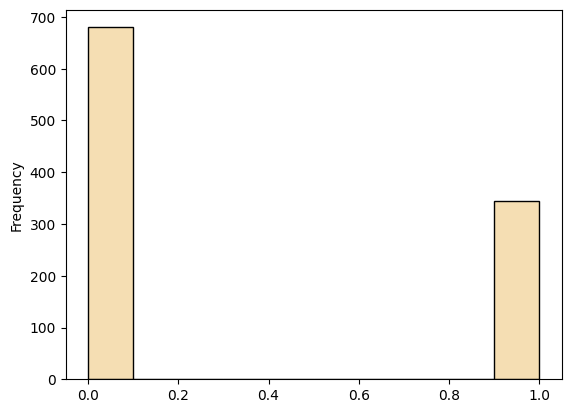

In [23]:
#exercise induced angina (1 = yes; 0 = no)
df['exang'].plot(kind='hist',color='wheat',edgecolor='black')

<Axes: ylabel='Frequency'>

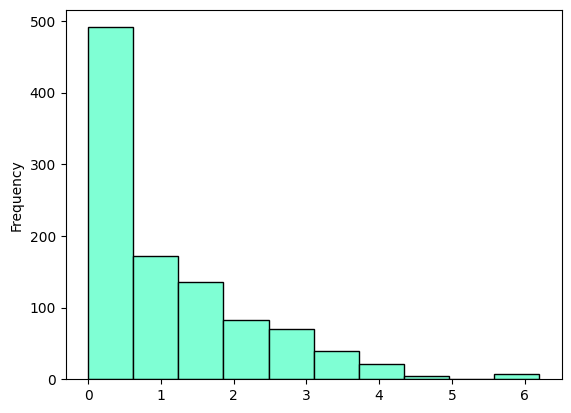

In [25]:
#ST depression induced by exercise relative to rest
df['oldpeak'].plot(kind='hist',color='aquamarine',edgecolor='black')

In [26]:
#dividing ip and op
#input-
  #age
  #sex
  #cp
  #trestbps
  #chol
  #fbs
  #restecg
  #thalach
  #exang
  #oldpeak
 #output=
  #target

In [27]:
x=df.iloc[:,0:10].values    #ip
x

array([[ 52. ,   1. ,   0. , ..., 168. ,   0. ,   1. ],
       [ 53. ,   1. ,   0. , ..., 155. ,   1. ,   3.1],
       [ 70. ,   1. ,   0. , ..., 125. ,   1. ,   2.6],
       ...,
       [ 47. ,   1. ,   0. , ..., 118. ,   1. ,   1. ],
       [ 50. ,   0. ,   0. , ..., 159. ,   0. ,   0. ],
       [ 54. ,   1. ,   0. , ..., 113. ,   0. ,   1.4]])

In [28]:
y=df.iloc[:,13].values        #op
y

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
#train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [30]:
print(x.shape)
print(x_train.shape)  #75%
print(x_test.shape)   #25%

(1025, 10)
(768, 10)
(257, 10)


In [31]:
print(y.shape)
print(y_train.shape)  #75%
print(y_test.shape)   #25%

(1025,)
(768,)
(257,)


In [32]:
#mormalisation or scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [33]:
#apply classifier
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [34]:
#fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
#predict the output
y_pred=model.predict(x_test)
print(y_pred)    #predicted val

[1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0]


In [37]:
print(y_test )#actual value

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]


In [38]:
#accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

83.26848249027238

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
#individual prediction 1
a=scaler.transform([[25,0,0,125,293,1,0,168,0,1.9]])

In [41]:
print(model.predict(a))

[1]


In [43]:
print(a)

[[-0.08510638  0.          0.          0.29245283  0.38127854  1.
   0.          0.74045802  0.          0.30645161]]


In [44]:
#individual prediction 2
b=scaler.transform([[70,1,0,138,174,1,0,125,0,2.6]])     #individual pred

In [45]:
print(model.predict(b))

[0]


In [47]:
print(b)

[[0.87234043 1.         0.         0.41509434 0.10958904 1.
  0.         0.41221374 0.         0.41935484]]
